In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
Heart_Disease_Data = pd.read_csv('heartDisease.csv')
Heart_Disease_Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
# Finding out number of columns and rows
Heart_Disease_Data.shape

(1025, 14)

In [4]:
Heart_Disease_Data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


### Finding the correlation coefficient values for each feature

In [5]:
# correlation coefficient values in each attributes.this will enable us take care of attributes 
#which has minimal impact in our prediction,and improve the accuracy of the algorithm
correlation_values=Heart_Disease_Data.corr()['target']
correlation_values.abs().sort_values(ascending=False)

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64

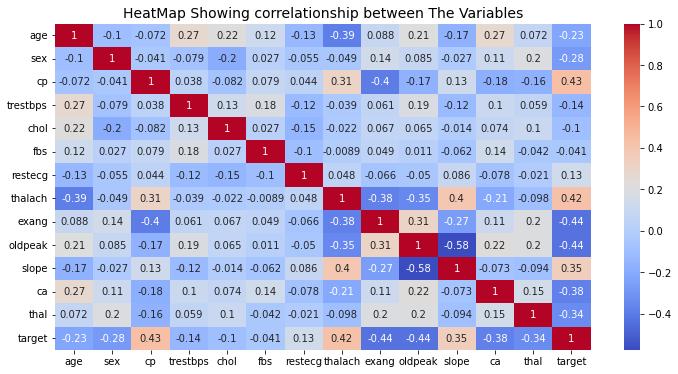

In [28]:
plt.figure(figsize=(12,6))
plt.title('HeatMap Showing correlationship between The Variables', fontdict ={'fontsize':14})
#Heart_Disease_Data = pd.read_csv('data.csv')
#sns.heatmap(data.corr())
sns.heatmap(Heart_Disease_Data.corr(),annot = True, cmap="coolwarm")

plt.savefig('heatmap.png',bbox_inches='tight')

In [6]:
X = Heart_Disease_Data.drop('target',axis=1)
y = Heart_Disease_Data['target']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=2)

In [8]:
#Making sure it was split into appropriate portions
print(X.shape,X_train.shape,X_test.shape)

(1025, 13) (820, 13) (205, 13)


### Importing and evaluating our first model

In [10]:
model = LogisticRegression()
model.fit(X_train,y_train)


C:\Users\CCRN\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
#Accuracy of the trained data
X_train_prediction = model.predict(X_train)
trained_data_accuracy = accuracy_score(X_train_prediction,y_train)
print('The Accuracy score is :',trained_data_accuracy)

The Accuracy score is : 0.8524390243902439


In [12]:
#Accuracy of the trained data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)
print('The Accuracy score is :',test_data_accuracy)

The Accuracy score is : 0.8048780487804879


### Import and evaluate our second model

In [9]:
model1 = SVC(kernel='linear')
model1.fit(X_train,y_train)

SVC(kernel='linear')

In [10]:
#Accuracy of the trained data
X_train_prediction = model1.predict(X_train)
trained_data_accuracy = accuracy_score(X_train_prediction,y_train)
print('The Accuracy score is :',trained_data_accuracy)

The Accuracy score is : 0.8695121951219512


In [11]:
#Accuracy of the trained data
X_test_prediction = model1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)
print('The Accuracy score is :',test_data_accuracy)

The Accuracy score is : 0.824390243902439


### Training and evaluating our 3rd model

In [16]:
model2 = KNeighborsClassifier()
model2.fit(X_train,y_train)

KNeighborsClassifier()

In [17]:
#Accuracy of the trained data
X_train_prediction = model2.predict(X_train)
trained_data_accuracy = accuracy_score(X_train_prediction,y_train)
print('The Accuracy score is :',trained_data_accuracy)

The Accuracy score is : 0.9060975609756098


In [18]:
#Accuracy of the trained data
X_test_prediction = model2.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)
print('The Accuracy score is :',test_data_accuracy)

The Accuracy score is : 0.7219512195121951


### Making Prediction with our best model

In [19]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [20]:
#Accuracy of the trained data
X_train_prediction = xgb.predict(X_train)
trained_data_accuracy = accuracy_score(X_train_prediction,y_train)
print('The Accuracy score is :',trained_data_accuracy)

The Accuracy score is : 1.0


In [21]:
#Accuracy of the trained data
X_test_prediction = xgb.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)
print('The Accuracy score is :',test_data_accuracy)

The Accuracy score is : 1.0


In [12]:
input_data = (53,1,0,140,203,1,0,155,1,3.1,0,0,3)

#chnage the input data to numpy array
input_data_numpy = np.asarray(input_data)

#reshape the array as we are predicting for one row of data
reshaped_data = input_data_numpy.reshape(1,-1)
    
#Make your prediction
prediction = model1.predict(reshaped_data)

if prediction[0]==0:
    print('Patient does not have Heart Disease')
else:
    print('Patient have Heart Disease')

Patient does not have Heart Disease


C:\Users\CCRN\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


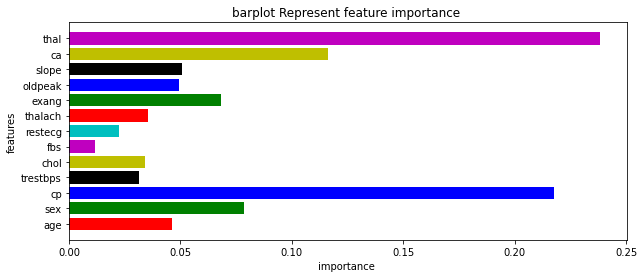

In [26]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = ['r','g','b','k','y','m','c'])
plt.show()

### Saving the model

In [13]:
import pickle

filename = 'Heart_Disease_Prediction_model.sav'
pickle.dump(model1,open(filename,'wb'))

#importing the model
#Heart_Disease_Prediction_model = pickle.load(open('Heart_Disease_Prediction_model.sav','rb'))